# Tarea 4

**Envío del PR inicial:** viernes 28 de septiembre

**Aceptación del PR:** martes 9 de octubre

In [1]:
include("Mapeos.jl")
include("Newton.jl")
using Plots
using LaTeXStrings
using Mapeos

gr(grid=false)

Plots.GRBackend()

### Documentación del módulo $Mapeos.jl$

A grandes rasgos, el script `Mapeos.jl` contiene dos funciones útiles para el cálculo y análisis de órbitas. 

#### A. Función  Mapeo (F, $x_0$; n_iters)

La función `Mapeo` devuelve un vector `xnn` que tiene por componentes los iterados calculados a partir de un punto inicial `x_0` evaluado en la funcion `F(x)` que es iterada un número $n$ de veces (`n_iters`). 

Dos puntos importantes deben mencionarse acerca de `Mapeo`:

##### [1] La función $Mapeo$ contiene 5 parámetros que pueden resultar útiles.
    
- `F::Function` es la función `F` que es evaluada en el punto inical $x_0$.

- `x₀::Real` es la condición inicial a partir de la cual comienza a iterarse la función `F` para generar la órbita del mapeo.
- `n::Int` es el número de iteraciones que se aplicarán a la función `F`.

- `xnn::Vector{Float64}` es un vector que tiene por componenetes al punto inicial $x_0$ como primer elemento, y a cada uno de los $n$ iterados $X^n$.

- `div::Bool` es una variable booleana que devuelve la etiqueta `true` si la órbita diverge a infinito positivo (o a infitino negativo) en algún iterado $X^n$ elemeneto del vector $xnn$, o `false` si la órbita está definida (no diverge) y presenta puntos fijos (atractores, repulsores, etc.).

##### Ejemplo

Sea $Mapeo1 = Mapeo(G, 3.0, 100)$ una varible definida como la función `G(x)` evaluada en el punto inicial $3.0$ y que será iterada 100 veces para generar una órbita descrita por las componenetes del vector $xnn$. 

Para llamar a las disntintas componentes se utilizará la siguiente convención:

- `Mapeo1.F` devuelve la función `G` del mapeo $Mapeo1$.

- `Mapeo1.x₀` arroja la condición inicial a partir de la cual comienza a iterarse la función `G` para generar la órbita del mapeo.

- `Mapeo1.n` devuelve el número de iteraciones que se aplicaron a la función `G`.

- `Mapeo1.xnn` arroja el vector que genera la órbita de Mapeo1. Tiene por componenetes al punto inicial $x_0  = 3.0$ como primer elemento, y a cada uno de los $100$ iterados $X^n$ (desde $X^1$ hasta $X^100$.

- `div::Bool` es una variable booleana que devuelve la etiqueta `true` si la órbita diverge a infinito positivo (o a infitino negativo) en alguno de los $100$ iterados $X^n$ (elemenetos del vector $xnn$), o `false` si la órbita está definida (no diverge) y presenta puntos fijos (atractores, repuulsores, etc.) en alguno de los $100$ iterados $X^n$.

[2] La función `Mapeo` tiene por cuarta componente a la cantidad numérica a partir de la cual se considerará que un iterado en el mapeo de F diverge a $infinito$. Por default se ha establecido el valor de este parámetro como $inf=1e7$.


#### B. Función grafica_mapeo

La función `grafica_mapeo` genera el análisis gráfico correspondiente a la órbita del mapeo `F(x)` evaluado en el punto inicial $x_0$ e iterado un número $n$ de veces (n_iters).  

grafica_mapeo(F, n) recibe un mapeo `F` y el intervalo de iteraciones que se desean incluir en el análisis gráfico. Se pueden añadir argumentos adicionales compatibles con `Plots`.

##### Ejemplo

Sea $Mapeo1 = Mapeo(G, 3.0, 100)$ una varible definida como la función `G(x)` evaluada en el punto inicial $3.0$ y que será iterada 100 veces para generar una órbita descrita por las componenetes del vector $xnn$. 

    grafica_mapeo(G, 1:20, legend=false) devuelve el análisis gráfico del mapeo `G(x)` evaluado en el punto inicial $3.0$ para las primeras 20 iteraciones. 

## 1

Para el mapeo $Q_c(x) = x^2 + c$, ¿cuál es el dominio $\cal{D}\subset \mathbb{R}$ de $Q_c(x)$ tal que la órbita generada por una condición inicial $x_0\in \cal{D}$ *no* escapa a infinito a ningún tiempo?

Definimos la función $Q_c(x) = x^2 + c$

In [2]:
Qc(x, c) = x^2 + c

Qc (generic function with 1 method)

Usando el módulo `Mapeos.jl` para el análisis gráfico de `Qc(x)` con diferentes valores de $c < 1/4$, obtenemos los siguientes reusltados:

### (a) Mapeo 1: $c = 0.10$

In [3]:
Qc1 = x -> Qc(x, 0.10)

(::#2) (generic function with 1 method)

In [4]:
rango1_x₀ = -2:0.1:2
mapeo1_Qc = [Mapeo(Qc1, x₀, 50) for x₀ in rango1_x₀];

In [5]:
for m in mapeo1_Qc
    println(m.x₀, "\t", m.div)
    end

-2.0	true
-1.9	true
-1.8	true
-1.7	true
-1.6	true
-1.5	true
-1.4	true
-1.3	true
-1.2	true
-1.1	true
-1.0	true
-0.9	true
-0.8	false
-0.7	false
-0.6	false
-0.5	false
-0.4	false
-0.3	false
-0.2	false
-0.1	false
0.0	false
0.1	false
0.2	false
0.3	false
0.4	false
0.5	false
0.6	false
0.7	false
0.8	false
0.9	true
1.0	true
1.1	true
1.2	true
1.3	true
1.4	true
1.5	true
1.6	true
1.7	true
1.8	true
1.9	true
2.0	true


In [6]:
mapeo1_false = []
mapeo1_true = []
for m in mapeo1_Qc
    if m.div == false
        push!(mapeo1_false, m)
        else m.div == true
        push!(mapeo1_true, m)
    end
end

In [7]:
mapeo1 = grafica_mapeo(mapeo1_false[1], 1:50, legend=false)
for m in mapeo1_false[2:end]
    grafica_mapeo!(m, 1:50)
end
xlims!(-1,1)

mapeo1;

### (b) Mapeo 2: $c = 0$

In [8]:
Qc2 = x -> Qc(x, 0.0)

(::#6) (generic function with 1 method)

In [9]:
rango2_x₀ = -2:0.1:2
mapeo2_Qc = [Mapeo(Qc2, x₀, 50) for x₀ in rango2_x₀];

In [10]:
for m in mapeo2_Qc
    println(m.x₀, "\t", m.div)
    end

-2.0	true
-1.9	true
-1.8	true
-1.7	true
-1.6	true
-1.5	true
-1.4	true
-1.3	true
-1.2	true
-1.1	true
-1.0	false
-0.9	false
-0.8	false
-0.7	false
-0.6	false
-0.5	false
-0.4	false
-0.3	false
-0.2	false
-0.1	false
0.0	false
0.1	false
0.2	false
0.3	false
0.4	false
0.5	false
0.6	false
0.7	false
0.8	false
0.9	false
1.0	false
1.1	true
1.2	true
1.3	true
1.4	true
1.5	true
1.6	true
1.7	true
1.8	true
1.9	true
2.0	true


In [11]:
mapeo2_false = []
mapeo2_true = []
for m in mapeo2_Qc
    if m.div == false
        push!(mapeo2_false, m)
        else m.div == true
        push!(mapeo2_true, m)
    end
end

In [12]:
mapeo2 = grafica_mapeo(mapeo2_false[1], 1:50, legend=false)
for m in mapeo2_false[2:end]
    grafica_mapeo!(m, 1:50)
end
xlims!(-1.5,1.5)
ylims!(-1.5, 2.5)

mapeo2;

### (c) Mapeo 3: $c = -0.10$

In [13]:
Qc3 = x -> Qc(x, -0.10)

(::#10) (generic function with 1 method)

In [14]:
rango3_x₀ = -2:0.1:2
mapeo3_Qc = [Mapeo(Qc3, x₀, 50) for x₀ in rango1_x₀];

In [15]:
for m in mapeo3_Qc
    println(m.x₀, "\t", m.div)
    end

-2.0	true
-1.9	true
-1.8	true
-1.7	true
-1.6	true
-1.5	true
-1.4	true
-1.3	true
-1.2	true
-1.1	true
-1.0	false
-0.9	false
-0.8	false
-0.7	false
-0.6	false
-0.5	false
-0.4	false
-0.3	false
-0.2	false
-0.1	false
0.0	false
0.1	false
0.2	false
0.3	false
0.4	false
0.5	false
0.6	false
0.7	false
0.8	false
0.9	false
1.0	false
1.1	true
1.2	true
1.3	true
1.4	true
1.5	true
1.6	true
1.7	true
1.8	true
1.9	true
2.0	true


In [16]:
mapeo3_false = []
mapeo3_true = []
for m in mapeo3_Qc
    if m.div == false
        push!(mapeo3_false, m)
        else m.div == true
        push!(mapeo3_true, m)
    end
end

In [17]:
mapeo3 = grafica_mapeo(mapeo3_false[1], 1:25, legend=false)
for m in mapeo3_false[2:end]
    grafica_mapeo!(m, 1:25)
end
xlims!(-1.5,1.5)

mapeo3;

### (d) Mapeo 4: $c = -0.50$

In [18]:
Qc4 = x -> Qc(x, -0.50)

(::#14) (generic function with 1 method)

In [19]:
rango4_x₀ = -2:0.1:2
mapeo4_Qc = [Mapeo(Qc4, x₀, 50) for x₀ in rango4_x₀];

In [20]:
for m in mapeo4_Qc
    println(m.x₀, "\t", m.div)
    end

-2.0	true
-1.9	true
-1.8	true
-1.7	true
-1.6	true
-1.5	true
-1.4	true
-1.3	false
-1.2	false
-1.1	false
-1.0	false
-0.9	false
-0.8	false
-0.7	false
-0.6	false
-0.5	false
-0.4	false
-0.3	false
-0.2	false
-0.1	false
0.0	false
0.1	false
0.2	false
0.3	false
0.4	false
0.5	false
0.6	false
0.7	false
0.8	false
0.9	false
1.0	false
1.1	false
1.2	false
1.3	false
1.4	true
1.5	true
1.6	true
1.7	true
1.8	true
1.9	true
2.0	true


In [21]:
mapeo4_false = []
mapeo4_true = []
for m in mapeo4_Qc
    if m.div == false
        push!(mapeo4_false, m)
        else m.div == true
        push!(mapeo4_true, m)
    end
end

In [22]:
mapeo4 = grafica_mapeo(mapeo4_false[1], 1:25, legend=false)
for m in mapeo4_false[2:end]
    grafica_mapeo!(m, 1:25)
end
xlims!(-1.5, 2)

mapeo4;
#savefig(mapeo4, "mapeo4_periodico2")

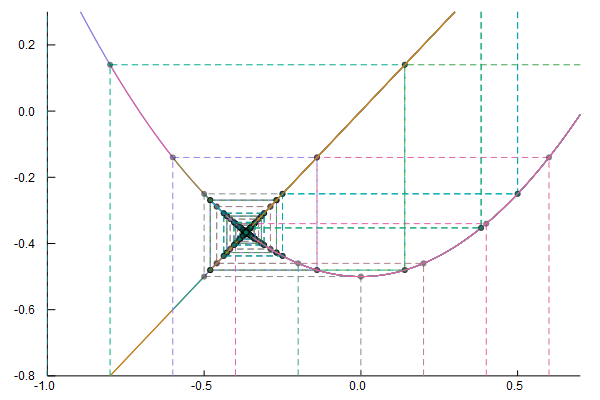

### Mapeo 5: c = - 0.80

In [23]:
Qc5 = x -> Qc(x, - 1)

(::#18) (generic function with 1 method)

In [24]:
rango5_x₀ = -2:0.1:2
mapeo5_Qc = [Mapeo(Qc5, x₀, 50) for x₀ in rango5_x₀];

In [25]:
for m in mapeo5_Qc
    println(m.x₀, "\t", m.div)
    end

-2.0	true
-1.9	true
-1.8	true
-1.7	true
-1.6	false
-1.5	false
-1.4	false
-1.3	false
-1.2	false
-1.1	false
-1.0	false
-0.9	false
-0.8	false
-0.7	false
-0.6	false
-0.5	false
-0.4	false
-0.3	false
-0.2	false
-0.1	false
0.0	false
0.1	false
0.2	false
0.3	false
0.4	false
0.5	false
0.6	false
0.7	false
0.8	false
0.9	false
1.0	false
1.1	false
1.2	false
1.3	false
1.4	false
1.5	false
1.6	false
1.7	true
1.8	true
1.9	true
2.0	true


In [26]:
mapeo5_false = []
mapeo5_true = []
for m in mapeo5_Qc
    if m.div == false
        push!(mapeo5_false, m)
        else m.div == true
        push!(mapeo5_true, m)
    end
end

In [27]:
mapeo5 = grafica_mapeo(mapeo5_false[1], 1:25, legend=false)
for m in mapeo5_false[2:end]
    grafica_mapeo!(m, 1:25)
end
xlims!(-2, 2.5)
ylims!(-2.5, 2.1)

mapeo5;

#### Mapeo 6: $c = -3$

In [28]:
Qc6 = x -> Qc(x, - 3)

(::#22) (generic function with 1 method)

In [29]:
rango6_x₀ = -2.5:0.1:2.5
mapeo6_Qc = [Mapeo(Qc6, x₀, 50) for x₀ in rango6_x₀];

In [30]:
for m in mapeo6_Qc
    println(m.x₀, "\t", m.div)
    end

-2.5	true
-2.4	true
-2.3	true
-2.2	true
-2.1	true
-2.0	false
-1.9	true
-1.8	true
-1.7	true
-1.6	true
-1.5	true
-1.4	true
-1.3	true
-1.2	true
-1.1	true
-1.0	false
-0.9	true
-0.8	true
-0.7	true
-0.6	true
-0.5	true
-0.4	true
-0.3	true
-0.2	true
-0.1	true
0.0	true
0.1	true
0.2	true
0.3	true
0.4	true
0.5	true
0.6	true
0.7	true
0.8	true
0.9	true
1.0	false
1.1	true
1.2	true
1.3	true
1.4	true
1.5	true
1.6	true
1.7	true
1.8	true
1.9	true
2.0	false
2.1	true
2.2	true
2.3	true
2.4	true
2.5	true


In [31]:
mapeo6_false = []
mapeo6_true = []
for m in mapeo6_Qc
    if m.div == false
        push!(mapeo6_false, m)
        else m.div == true
        push!(mapeo6_true, m)
    end
end

In [32]:
mapeo6 = grafica_mapeo(mapeo6_false[1], 1:25, legend=false)
for m in mapeo6_false[2:end]
    grafica_mapeo!(m, 1:25)
end
xlims!(-3, 3.5)
ylims!(-3.5,4)

mapeo6;

### () Conclusiones

[a] Para que el dominio del mapeo este definido, y además, obtengamos raíces reales del mapeo, los valores para $c$ deben oscilar entre $-2 ≤ c < 1/4 $

[b] Con $c \epsilon [1/4, -2]$, el dominio para el cual el mapeo esta definidio ($i.e$ no diverge a infinito) es $[-2, 2]$.

[c] Destacamos que:

Cuando $c = -3$, el dominio para el cual la órbita esta bien definida es 


## 2

- Obtengan el diagrama de bifurcación que se muestra en la Fig. 2 del mapeo $Q_c(x)$ a partir de la iteración de una condición inicial.

- Caractericen la cuenca de atracción de $p_-(c)$ cuando el punto es estable.


## 3

Para el mapeo $F_\lambda(x) = \lambda x(1-x)$, ¿qué podemos decir de la bifurcación que ocurre en $\lambda_0=1$? ¿Es o no una bifurcación de silla-nodo?

## 4

- Obtengan numéricamente el diagrama de bifurcación del mapeo $Q_c(x)$ a partir de la iteración de una condición inicial en el intervalo de parámetros $-2<c<1/4$. Para esto se necesita iterar un gran número de veces (hasta llegar al ciclo periódico) condiciones iniciales, y repetir esto para *muchos* valores de $c$ en el intervalo. Vale la pena hacer notar que, si hay ciclos periódicos, *a priori* no conocen su periodicidad.

- Para ciertos valores de $c$ característicos, muestren el análisis gráfico del mapeo $Q_c(x)$ a fin de entender los resultados.


## 5

El objetivo de este ejercicio es relacionar, la velocidad de convergencia con que un punto fijo (o una órbita periódica, en el caso de los dos últimos incisos) atraen a puntos suficientemente cercanos, con la derivada del mapeo en el punto fijo (o ciclo periódico). La idea es, entonces, calcular primero el punto fijo y, después, medir cómo la distancia de los iterados sucesivos (de una condición inicial $x_0$) al punto fijo se comporta en el tiempo, para los siguientes mapeos:

- $F(x) = x^2+0.25$

- $F(x) = 3x(1-x)$

- $F(x) = \exp(x-1)$

- $F(x) = x^2 - 1.25$

- $F(x) = \exp(x+1)$

Deberán resolver algunas cosas intermedias. Por ejemplo, ¿qué tanto deben acercarse al punto fijo, a fin de evitar ruido numérico? ¿Qué hay que hacer en el caso en que el punto tenga una estabilidad neutra, i.e., no sea no atractivo ni repulsivo?

En los dos últimos incisos, el interés está en los ciclos de periodo 2.

### (a) $F(x) = x^2+0.25$

In [312]:
F1(x) = x^2 + 0.25
F1_p(x) = 2x

F1_p (generic function with 1 method)

In [313]:
cond_iniciales1 = -5:0.2:5
raices1 = [newton(x -> F1(x) - x,  x -> F1_p(x) - 1, x0) for x0 in cond_iniciales1];
unique(raices1)

51-element Array{Float64,1}:
 0.5
 0.5
 0.5
 0.5
 0.5
 0.5
 0.5
 0.5
 0.5
 0.5
 0.5
 0.5
 0.5
 ⋮  
 0.5
 0.5
 0.5
 0.5
 0.5
 0.5
 0.5
 0.5
 0.5
 0.5
 0.5
 0.5

In [101]:
x1_0 = 0.1
mapeoF1 = Mapeo(F1, x1_0, 50)

Mapeos.Mapeo(F1, 0.1, 50, [0.1, 0.26, 0.3176, 0.35087, 0.37311, 0.389211, 0.401485, 0.41119, 0.419077, 0.425626  …  0.478596, 0.479054, 0.479493, 0.479913, 0.480317, 0.480704, 0.481076, 0.481434, 0.481779, 0.482111], [0.1, 0.1, 0.26, 0.26, 0.3176, 0.3176, 0.35087, 0.35087, 0.37311, 0.37311  …  0.480317, 0.480704, 0.480704, 0.481076, 0.481076, 0.481434, 0.481434, 0.481779, 0.481779, 0.482111], [-10000.0, 0.26, 0.26, 0.3176, 0.3176, 0.35087, 0.35087, 0.37311, 0.37311, 0.389211  …  0.480704, 0.480704, 0.481076, 0.481076, 0.481434, 0.481434, 0.481779, 0.481779, 0.482111, 0.482111], false)

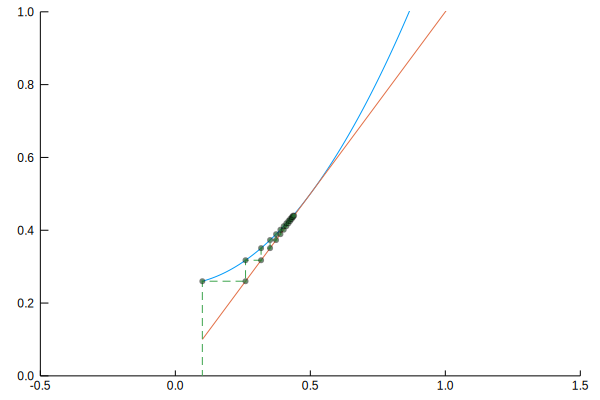

In [102]:
gF1 = grafica_mapeo(mapeoF1, 1:25, legend=false)
xlims!(-0.5, 01.5)
ylims!(0,1)

gF1

In [103]:
iterados1 = mapeoF1.xnn 
distanciasF1 = abs.(iterados1 - x1_0)
n_iter1 = 1:mapeoF1.n

1:50

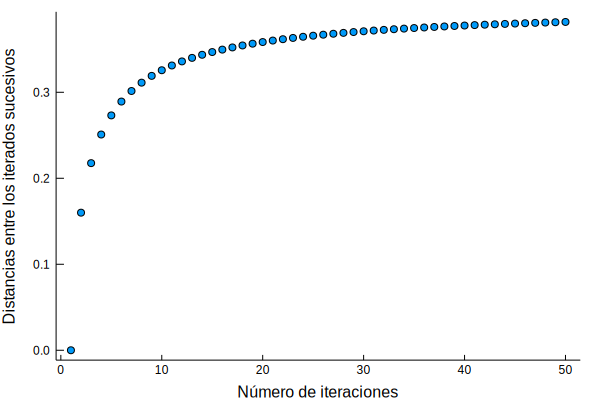

In [104]:
scatter(n_iter1, distanciasF1, xlabel = "Número de iteraciones", ylabel = "Distancias entre los iterados sucesivos", legend = false)

In [105]:
VelocidadF1 = [distanciasF1[n] - distanciasF1[n + 1] for n in 1:length(distanciasF1)-1]

50-element Array{Float64,1}:
 -0.16       
 -0.0576     
 -0.0332698  
 -0.0222398  
 -0.0161012  
 -0.0122743  
 -0.0097052  
 -0.00788718 
 -0.00654847 
 -0.00553151 
 -0.00473931 
 -0.00410924 
 -0.00359929 
  ⋮          
 -0.000524829
 -0.000501058
 -0.000478877
 -0.000458148
 -0.000438745
 -0.000420558
 -0.000403485
 -0.000387438
 -0.000372336
 -0.000358106
 -0.000344681
 -0.000332001

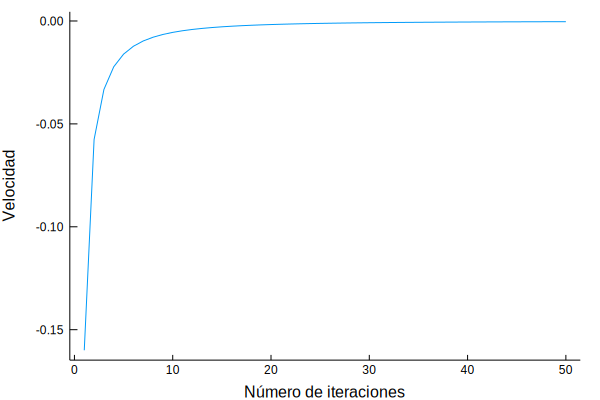

In [185]:
plot(n_iter1, VelocidadF1, xlabel = "Número de iteraciones", ylabel = "Velocidad", legend = false)

### (b) $F(x) = 3x(1-x)$

In [173]:
F2(x) = 3x*(1-x)
F2_p(x) = 3 - 6x

F2_p (generic function with 1 method)

In [174]:
cond_iniciales2 = -10:0.2:10
raices2 = [newton(x -> F2(x) - x,  x -> F2_p(x) - 1, x0) for x0 in cond_iniciales2];

In [175]:
unique(raices2)

3-element Array{Float64,1}:
 0.0     
 0.666667
 0.666667

#### (i) Punto fijo $x = 0.666667$

In [176]:
x2_0 = 0.9
mapeoF2 = Mapeo(F2, x2_0, 50)

Mapeos.Mapeo(F2, 0.9, 50, [0.9, 0.27, 0.5913, 0.724993, 0.598135, 0.721109, 0.603333, 0.717967, 0.607471, 0.71535  …  0.697412, 0.633086, 0.696865, 0.633733, 0.696347, 0.634344, 0.695855, 0.634922, 0.695388, 0.635471], [0.9, 0.9, 0.27, 0.27, 0.5913, 0.5913, 0.724993, 0.724993, 0.598135, 0.598135  …  0.696347, 0.634344, 0.634344, 0.695855, 0.695855, 0.634922, 0.634922, 0.695388, 0.695388, 0.635471], [-10000.0, 0.27, 0.27, 0.5913, 0.5913, 0.724993, 0.724993, 0.598135, 0.598135, 0.721109  …  0.634344, 0.634344, 0.695855, 0.695855, 0.634922, 0.634922, 0.695388, 0.695388, 0.635471, 0.635471], false)

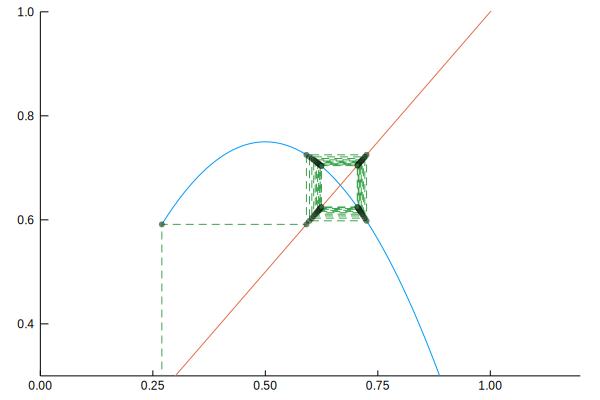

In [178]:
gF2 = grafica_mapeo(mapeoF2, 1:50, legend=false)
xlims!(0, 1.2)
ylims!(0.3,1)

gF2

In [179]:
iterados2 = mapeoF2.xnn 
distanciasF2 = abs.(iterados2 - x2_0)
n_iter2 = 1:mapeoF2.n

1:50

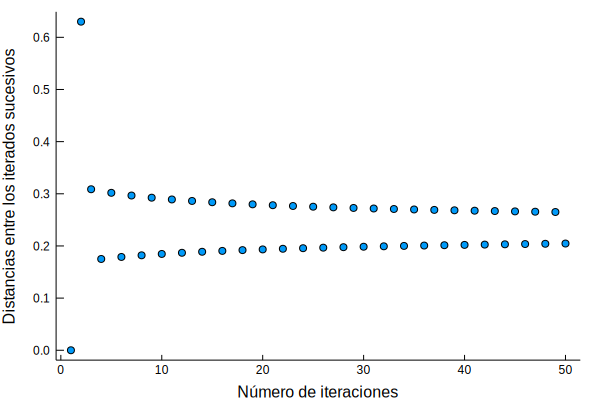

In [180]:
scatter(n_iter2, distanciasF2, xlabel = "Número de iteraciones", ylabel = "Distancias entre los iterados sucesivos", legend = false)

In [181]:
VelocidadF2 = [distanciasF2[n] - distanciasF2[n + 1] for n in 1:length(distanciasF2)-1]

50-element Array{Float64,1}:
 -0.63     
  0.3213   
  0.133693 
 -0.126858 
  0.122974 
 -0.117776 
  0.114634 
 -0.110496 
  0.107879 
 -0.104477 
  0.102248 
 -0.0993835
  0.0974533
  ⋮        
  0.0663241
 -0.0655929
  0.0650136
 -0.0643265
  0.0637792
 -0.0631319
  0.0626138
 -0.0620026
  0.061511 
 -0.0609326
  0.0604654
 -0.059917 

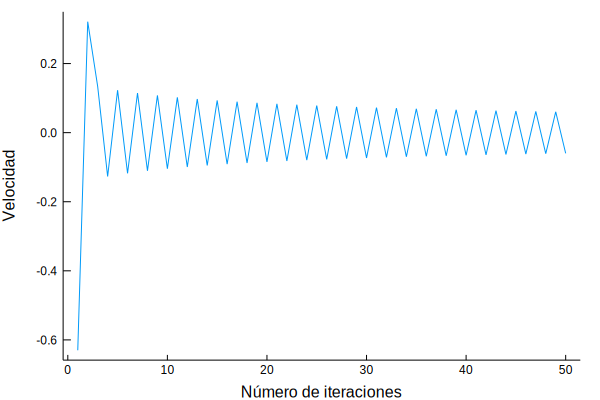

In [183]:
plot(n_iter2, VelocidadF2, xlabel = "Número de iteraciones", ylabel = "Velocidad", legend = false)

#### (ii) Punto fijo $x = 0.4$

In [192]:
x21_0 = 0.4
mapeoF21 = Mapeo(F2, x21_0, 50)

Mapeos.Mapeo(F2, 0.4, 50, [0.4, 0.72, 0.6048, 0.717051, 0.608667, 0.714575, 0.611873, 0.712453, 0.614591, 0.710607  …  0.696181, 0.634539, 0.695698, 0.635107, 0.695238, 0.635646, 0.6948, 0.636158, 0.694383, 0.636646], [0.4, 0.4, 0.72, 0.72, 0.6048, 0.6048, 0.717051, 0.717051, 0.608667, 0.608667  …  0.695238, 0.635646, 0.635646, 0.6948, 0.6948, 0.636158, 0.636158, 0.694383, 0.694383, 0.636646], [-10000.0, 0.72, 0.72, 0.6048, 0.6048, 0.717051, 0.717051, 0.608667, 0.608667, 0.714575  …  0.635646, 0.635646, 0.6948, 0.6948, 0.636158, 0.636158, 0.694383, 0.694383, 0.636646, 0.636646], false)

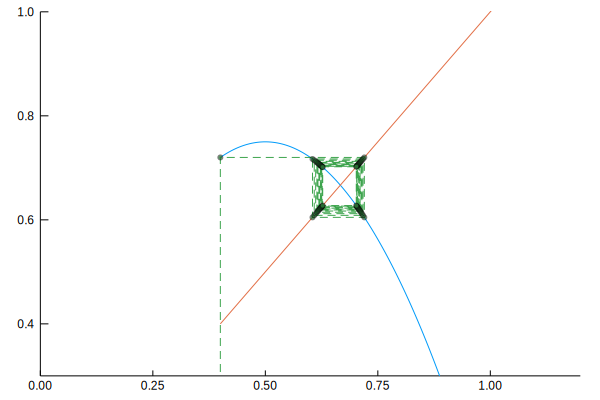

In [193]:
gF21 = grafica_mapeo(mapeoF21, 1:50, legend=false)
xlims!(0, 1.2)
ylims!(0.3,1)

gF21

In [194]:
iterados21 = mapeoF21.xnn 
distanciasF21 = abs.(iterados21 - x21_0)
n_iter21 = 1:mapeoF21.n

1:50

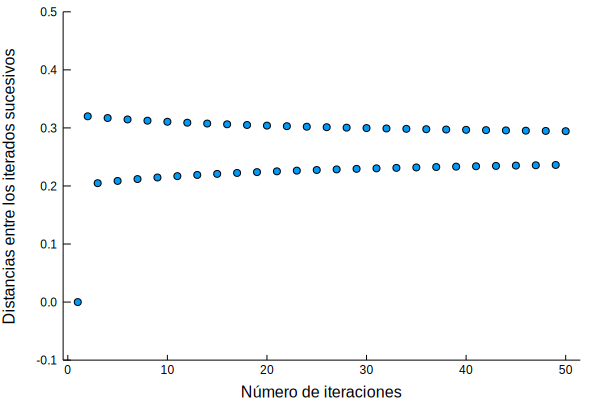

In [199]:
scatter(n_iter21, distanciasF21, xlabel = "Número de iteraciones", ylabel = "Distancias entre los iterados sucesivos", legend = false)
ylims!(-0.1, 0.5)

In [190]:
VelocidadF21 = [distanciasF21[n] - distanciasF21[n + 1] for n in 1:length(distanciasF21)-1]

50-element Array{Float64,1}:
 -0.32     
  0.1152   
 -0.112251 
  0.108384 
 -0.105908 
  0.102701 
 -0.10058  
  0.0978622
 -0.0960158
  0.0936723
 -0.0920446
  0.0899957
 -0.0885456
  ⋮        
 -0.0633863
  0.0627513
 -0.0622422
  0.0616422
 -0.0611589
  0.0605908
 -0.0601312
  0.0595922
 -0.0591543
  0.058642 
 -0.0582243
  0.0577366

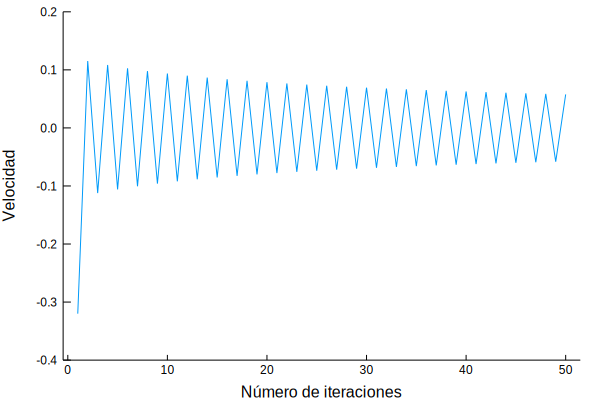

In [202]:
plot(n_iter21, VelocidadF21, xlabel = "Número de iteraciones", ylabel = "Velocidad", legend = false)
ylims!(-0.4, 0.2)

### (c) $F(x) = \exp(x-1)$

In [302]:
F3(x) = exp(x-1)
F3_p(x) = exp(x-1)

F3_p (generic function with 1 method)

In [303]:
cond_iniciales3 = -100:0.2:100
raices3 = [newton(x -> F3(x) - x,  x -> F3_p(x) - 1, x0) for x0 in cond_iniciales3];
unique(raices3)

350-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮  
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [304]:
x3_0 = 0.5
mapeoF3 = Mapeo(F3, x3_0, 50)

Mapeos.Mapeo(F3, 0.5, 50, [0.5, 0.606531, 0.674712, 0.722319, 0.757539, 0.784694, 0.806295, 0.823901, 0.838535, 0.850896  …  0.956357, 0.957295, 0.958194, 0.959056, 0.959883, 0.960677, 0.96144, 0.962174, 0.962881, 0.963561], [0.5, 0.5, 0.606531, 0.606531, 0.674712, 0.674712, 0.722319, 0.722319, 0.757539, 0.757539  …  0.959883, 0.960677, 0.960677, 0.96144, 0.96144, 0.962174, 0.962174, 0.962881, 0.962881, 0.963561], [-10000.0, 0.606531, 0.606531, 0.674712, 0.674712, 0.722319, 0.722319, 0.757539, 0.757539, 0.784694  …  0.960677, 0.960677, 0.96144, 0.96144, 0.962174, 0.962174, 0.962881, 0.962881, 0.963561, 0.963561], false)

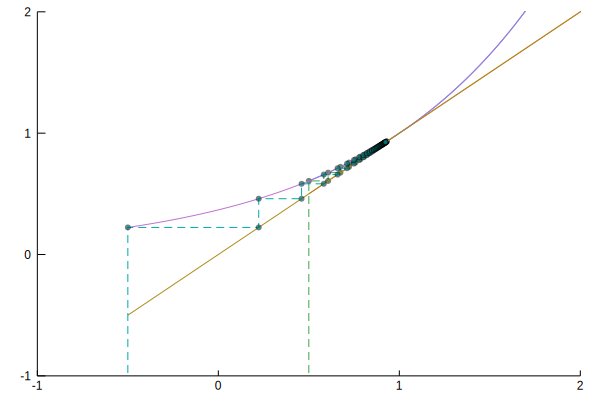

In [305]:
gF3 = grafica_mapeo(mapeoF3, 1:50, legend=false)
grafica_mapeo!(Mapeo(F3, -0.5, 50), 1:50)
xlims!(-1, 2)
ylims!(-1,2)

gF3

In [306]:
iterados3 = mapeoF3.xnn 
distanciasF3 = abs.(iterados3 - x3_0)
n_iter3 = 1:mapeoF3.n

1:50

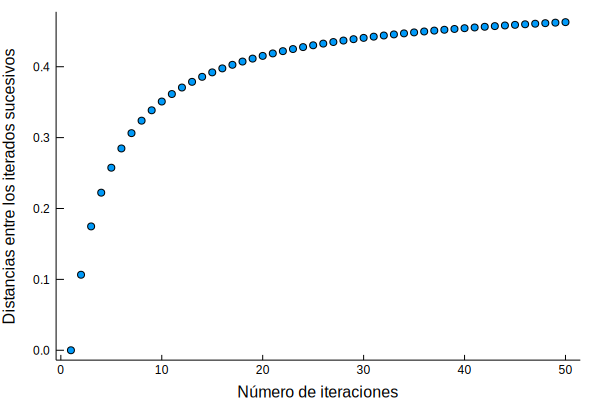

In [307]:
scatter(n_iter3, distanciasF3, xlabel = "Número de iteraciones", ylabel = "Distancias entre los iterados sucesivos", legend = false)

In [308]:
VelocidadF3 = [distanciasF3[n] - distanciasF3[n + 1] for n in 1:length(distanciasF3)-1]

50-element Array{Float64,1}:
 -0.106531   
 -0.0681813  
 -0.0476073  
 -0.0352194  
 -0.0271554  
 -0.0216007  
 -0.017606   
 -0.014634   
 -0.0123614  
 -0.0105835  
 -0.00916589 
 -0.00801693 
 -0.00707248 
  ⋮          
 -0.00107483 
 -0.00102632 
 -0.000981022
 -0.000938667
 -0.000899004
 -0.000861808
 -0.000826878
 -0.000794034
 -0.000763114
 -0.000733968
 -0.000706464
 -0.000680481

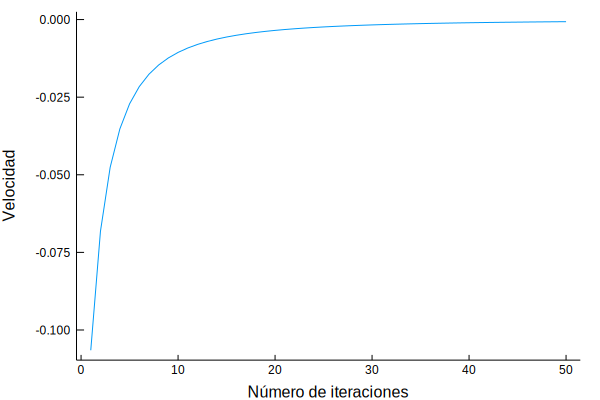

In [309]:
plot(n_iter3, VelocidadF3, xlabel = "Número de iteraciones", ylabel = "Velocidad", legend = false)

### (d) $F(x) = x^2 - 1.25$

In [310]:
F4(x) = x^2 - 1.25
F4_p(x) = 2x

F4_p (generic function with 1 method)

In [255]:
cond_iniciales4 = -5:0.2:5
raices4 = [newton(x -> F4(x) - x,  x -> F4_p(x) - 1, x0) for x0 in cond_iniciales4];
unique(raices4)

2-element Array{Float64,1}:
 -0.724745
  1.72474 

#### (i) Punto fijo $x=-0.724745$

In [256]:
x41_0 = -0.2
mapeoF41 = Mapeo(F4, x41_0, 50)

Mapeos.Mapeo(F4, -0.2, 50, [-0.2, -1.21, 0.2141, -1.20416, 0.200004, -1.21, 0.214096, -1.20416, 0.200008, -1.21  …  -1.20998, 0.21406, -1.20418, 0.200045, -1.20998, 0.214056, -1.20418, 0.20005, -1.20998, 0.214052], [-0.2, -0.2, -1.21, -1.21, 0.2141, 0.2141, -1.20416, -1.20416, 0.200004, 0.200004  …  -1.20998, 0.214056, 0.214056, -1.20418, -1.20418, 0.20005, 0.20005, -1.20998, -1.20998, 0.214052], [-10000.0, -1.21, -1.21, 0.2141, 0.2141, -1.20416, -1.20416, 0.200004, 0.200004, -1.21  …  0.214056, 0.214056, -1.20418, -1.20418, 0.20005, 0.20005, -1.20998, -1.20998, 0.214052, 0.214052], false)

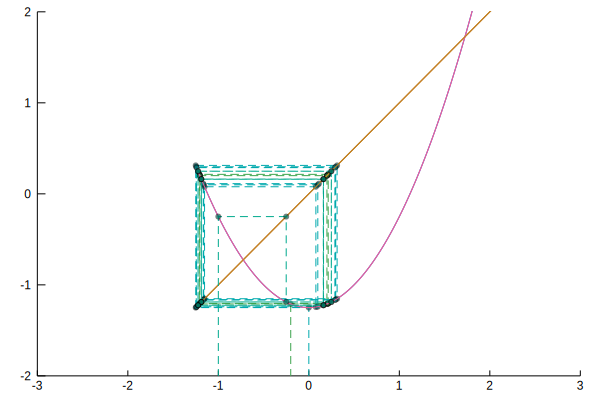

In [287]:
gF41 = grafica_mapeo(mapeoF41, 1:25, legend=false)
grafica_mapeo!(Mapeo(F4, 0, 50), 1:25)
grafica_mapeo!(Mapeo(F4, -1, 50), 1:25)
xlims!(-3, 3)
ylims!(-2,2)

gF41

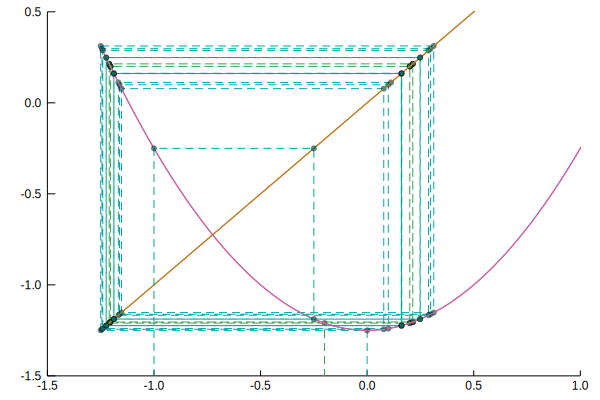

In [290]:
gF41 = grafica_mapeo(mapeoF41, 1:25, legend=false)
grafica_mapeo!(Mapeo(F4, 0, 50), 1:25)
grafica_mapeo!(Mapeo(F4, -1, 50), 1:25)
xlims!(-1.5, 1)
ylims!(-1.5,0.5)

gF41

In [291]:
iterados41 = mapeoF41.xnn 
distanciasF41 = abs.(iterados41 - x41_0)
n_iter41 = 1:mapeoF41.n

1:50

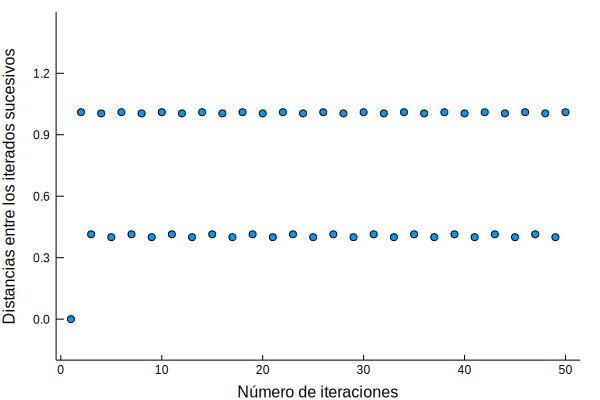

In [292]:
scatter(n_iter41, distanciasF41, xlabel = "Número de iteraciones", ylabel = "Distancias entre los iterados sucesivos", legend = false)
ylims!(-0.2, 1.5)

In [293]:
VelocidadF41 = [distanciasF41[n] - distanciasF41[n + 1] for n in 1:length(distanciasF41)-1]

50-element Array{Float64,1}:
 -1.01    
  0.5959  
 -0.590061
  0.604157
 -0.609994
  0.595902
 -0.590067
  0.604155
 -0.609988
  0.595905
 -0.590073
  0.604152
 -0.609983
  ⋮       
 -0.590113
  0.604135
 -0.609942
  0.595924
 -0.590118
  0.604133
 -0.609936
  0.595926
 -0.590124
  0.60413 
 -0.609931
  0.595928

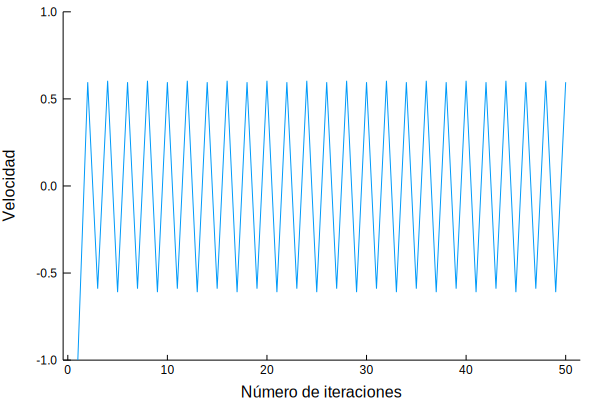

In [294]:
plot(n_iter41, VelocidadF41, xlabel = "Número de iteraciones", ylabel = "Velocidad", legend = false)
ylims!(-1, 1)

#### (ii) Punto fijo $x=1.724745$

In [295]:
x42_0 = 0.7
mapeoF42 = Mapeo(F4, x42_0, 50)

Mapeos.Mapeo(F4, 0.7, 50, [0.7, -0.76, -0.6724, -0.797878, -0.61339, -0.873752, -0.486557, -1.01326, -0.223299, -1.20014  …  -1.20031, 0.19075, -1.21361, 0.22286, -1.20033, 0.1908, -1.2136, 0.222814, -1.20035, 0.19085], [0.7, 0.7, -0.76, -0.76, -0.6724, -0.6724, -0.797878, -0.797878, -0.61339, -0.61339  …  -1.20033, 0.1908, 0.1908, -1.2136, -1.2136, 0.222814, 0.222814, -1.20035, -1.20035, 0.19085], [-10000.0, -0.76, -0.76, -0.6724, -0.6724, -0.797878, -0.797878, -0.61339, -0.61339, -0.873752  …  0.1908, 0.1908, -1.2136, -1.2136, 0.222814, 0.222814, -1.20035, -1.20035, 0.19085, 0.19085], false)

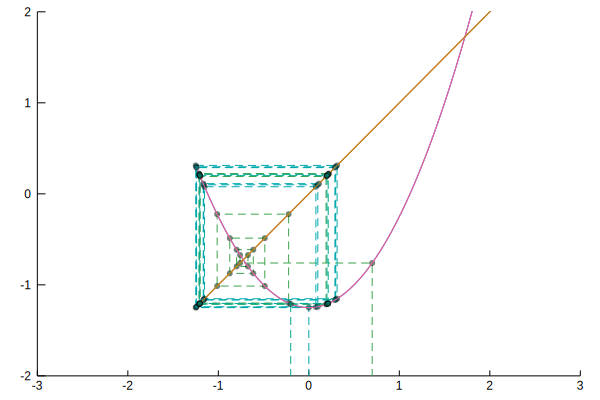

In [296]:
gF42 = grafica_mapeo(mapeoF42, 1:25, legend=false)
grafica_mapeo!(Mapeo(F4, 0, 50), 1:25)
grafica_mapeo!(Mapeo(F4, -0.2, 50), 1:25)
xlims!(-3, 3)
ylims!(-2,2)

gF42

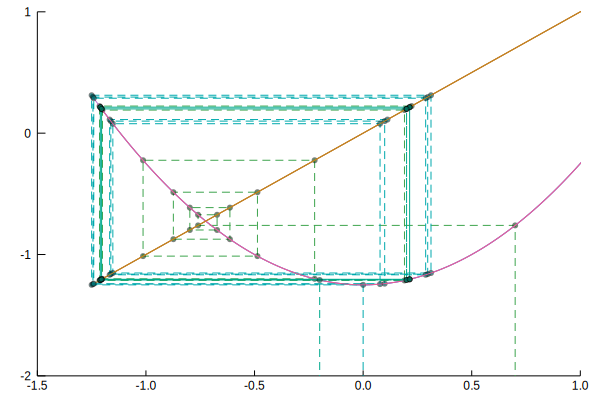

In [297]:
gF42 = grafica_mapeo(mapeoF42, 1:25, legend=false)
grafica_mapeo!(Mapeo(F4, 0, 50), 1:25)
grafica_mapeo!(Mapeo(F4, -0.2, 50), 1:25)
xlims!(-1.5, 1)
ylims!(-2,1)

gF42

In [298]:
iterados42 = mapeoF42.xnn 
distanciasF42 = abs.(iterados42 - x42_0)
n_iter42 = 1:mapeoF42.n

1:50

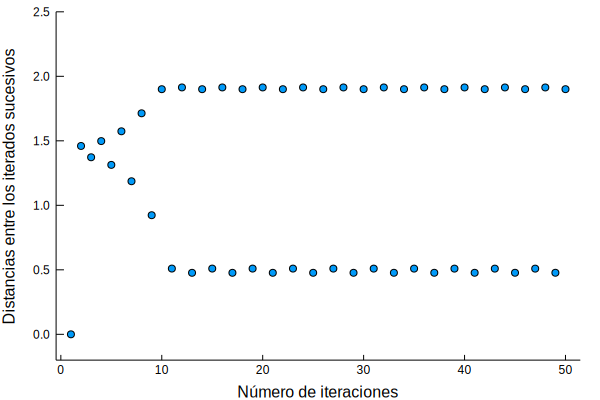

In [299]:
scatter(n_iter42, distanciasF42, xlabel = "Número de iteraciones", ylabel = "Distancias entre los iterados sucesivos", legend = false)
ylims!(-0.2, 2.5)

In [300]:
VelocidadF42 = [distanciasF42[n] - distanciasF42[n + 1] for n in 1:length(distanciasF42)-1]

50-element Array{Float64,1}:
 -1.46    
  0.0876  
 -0.125478
  0.184488
 -0.260362
  0.387195
 -0.526706
  0.789963
 -0.976838
  1.39047 
 -1.4041  
  1.43702 
 -1.42341 
  ⋮       
 -1.40433 
  1.43654 
 -1.42322 
  1.39106 
 -1.40436 
  1.43647 
 -1.42319 
  1.39113 
 -1.4044  
  1.43641 
 -1.42317 
  1.3912  

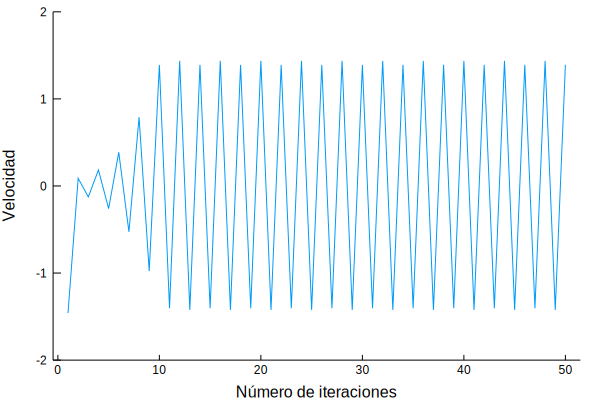

In [301]:
plot(n_iter42, VelocidadF42, xlabel = "Número de iteraciones", ylabel = "Velocidad", legend = false)
ylims!(-2, 2)

### (e) $F(x) = exp(x+1)$

In [318]:
F5(x) = exp(x+1)
F5_p(x) = exp(x+1)

F5_p (generic function with 1 method)

$F(x) = exp(x+1)$ no tiene raíces pues la exponencial en ningún punto "corta" a la idéntica. Esto puede observarse en la gráfica que se muestra a continuación.

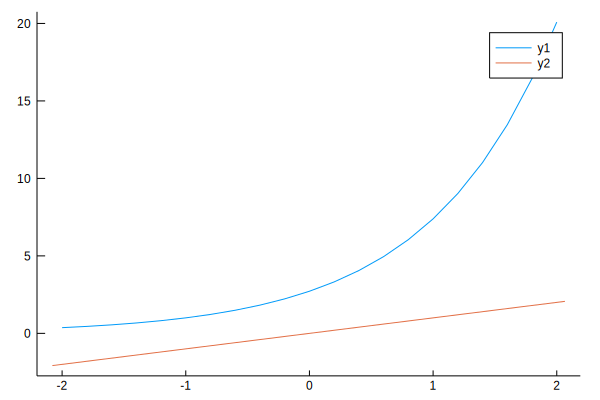

In [328]:
plot(-2:0.2:2, x->exp(x+1))
plot!(x->x)

#### (i) Punto fijo $x=-0.724745$

In [342]:
x51_0 = 1
mapeoF51 = Mapeo(F5, x51_0, 50)

Mapeos.Mapeo(F5, 1, 50, [1.0, 7.38906, 4398.66, Inf, Inf, Inf, Inf, Inf, Inf, Inf  …  Inf, Inf, Inf, Inf, Inf, Inf, Inf, Inf, Inf, Inf], [1.0, 1.0, 7.38906, 7.38906, 4398.66, 4398.66, Inf, Inf, Inf, Inf  …  Inf, Inf, Inf, Inf, Inf, Inf, Inf, Inf, Inf, Inf], [-10000.0, 7.38906, 7.38906, 4398.66, 4398.66, Inf, Inf, Inf, Inf, Inf  …  Inf, Inf, Inf, Inf, Inf, Inf, Inf, Inf, Inf, Inf], true)

In [356]:
mapeos = [Mapeo(F5, x0, 3) for x0 in -10:.5:10];

In [368]:
mapeos[1].xnn

4-element Array{Float64,1}:
 -10.0       
   0.00012341
   2.71862   
  41.2074    

In [357]:
for m in mapeos println(m.div) end

false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true


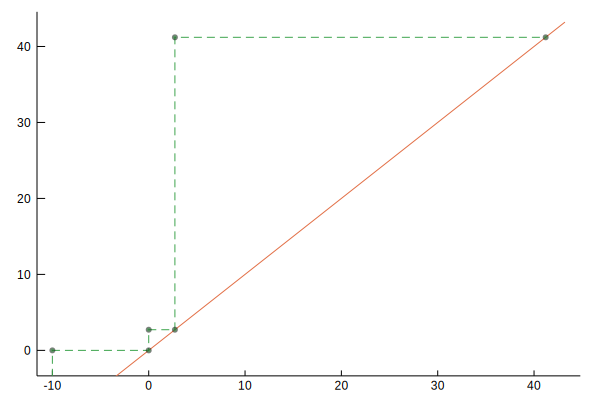

In [370]:
grafica_mapeo(mapeos[1], 1:7, legend=false)
#grafica_mapeo!(Mapeo(F5, 0.9, 50), 1:25)